In [1]:
%matplotlib inline

In [2]:
# %load c302_MotorToMuscleSynTest.py
import c302
import sys

import neuroml.writers as writers

def setup(parameter_set,
          generate=False,
          duration=400,
          dt=0.05,
          target_directory='examples',
          data_reader="UpdatedSpreadsheetDataReader"):
    
    exec ('from parameters_%s import ParameterisedModel' % parameter_set)
    params = ParameterisedModel()

    #params.set_bioparameter("unphysiological_offset_current", "0pA", "Testing TapWithdrawal", "0")
    params.set_bioparameter("unphysiological_offset_current_del", "0 ms", "Testing TapWithdrawal", "0")
    params.set_bioparameter("unphysiological_offset_current_dur", "2000 ms", "Testing TapWithdrawal", "0")

    cells = []
    #cells += ['AVAL']
    #cells += ['DB6']

    muscles_to_include = ['MVL06', 'MVL07', 'MVL08', 'MVL09']

  
    cells_to_stimulate = ['MVL07']

    cells_to_plot = cells
    reference = "c302_%s_MuscleSignalPropagation" % parameter_set

    conns_to_include = [
    ]

    conn_polarity_override = {
      
    }

    conn_number_override = {
    }

    
    

    if generate:
        nml_doc = c302.generate(reference,
                                params,
                                cells=cells,
                                cells_to_plot=cells_to_plot,
                                cells_to_stimulate=cells_to_stimulate,
                                conns_to_include=conns_to_include,
                                conn_polarity_override=conn_polarity_override,
                                conn_number_override=conn_number_override,
                                muscles_to_include=muscles_to_include,
                                duration=duration,
                                dt=dt,
                                target_directory=target_directory,
                                data_reader=data_reader)

    return cells, cells_to_stimulate, params, muscles_to_include, reference


w, x, y, z, reference = setup("C2", generate=True, data_reader="UpdatedSpreadsheetDataReader")

Set default parameters for C
Set default parameters for C2
c302      >>>  
c302      >>> 
c302      >>> Parameters and setting used to generate this network:
c302      >>> 
c302      >>>     Data reader:                    UpdatedSpreadsheetDataReader
c302      >>>     Cells:                          []
c302      >>>     Cell stimulated:                ['MVL07']
c302      >>>     Connection:                     []
c302      >>>     Connection numbers overridden:  {}
c302      >>>     Connection numbers scaled:      None
c302      >>>     Connection polarities override: {}
c302      >>>     Muscles:                        ['MVL06', 'MVL07', 'MVL08', 'MVL09']
c302      >>> 
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
c302      >>>  Finished loading 0 cells
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
c302      >>>  Positioning muscle: MVL06 at (-80,-120,-80

In [3]:
# Replace this with your model path.  
# This example is from https://github.com/OpenSourceBrain/IzhikevichModel.
LEMS_MODEL_PATH = 'examples/LEMS_%s.xml' % reference

In [4]:
import os,sys
from pyneuroml import pynml

pyNeuroML >>> Reloading: Data loaded from examples/c302_C2_MuscleSignalPropagation.dat (jNeuroML)
pyNeuroML >>> Reloading: Data loaded from examples/c302_C2_MuscleSignalPropagation.muscles.dat (jNeuroML)
pyNeuroML >>> Reloading: Data loaded from examples/c302_C2_MuscleSignalPropagation.muscles.activity.dat (jNeuroML)


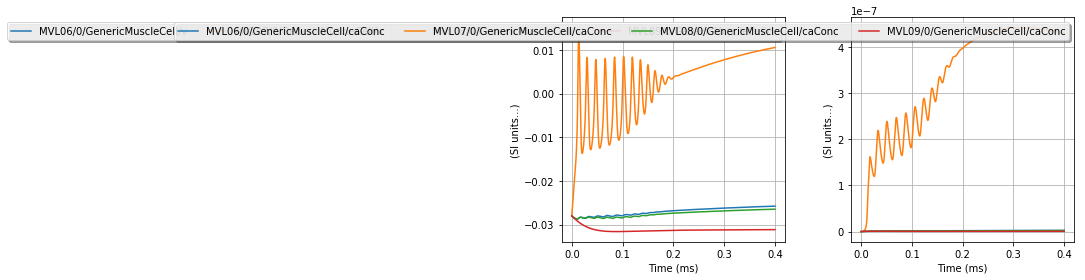

In [5]:
results = pynml.run_lems_with_jneuroml(os.path.split(LEMS_MODEL_PATH)[1], 
                             verbose=False, load_saved_data=True, nogui=True, 
                             exec_in_dir=os.path.split(LEMS_MODEL_PATH)[0],
                             plot=True)